In [25]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [26]:

# Load the CSV file
Jumia = pd.read_csv('Jumia_info_final.csv')

# Display the first five rows to confirm it loaded correctly
print(Jumia.head(5))


   Unnamed: 0                                       Product Name  \
0           0  OTG Type C To USB Converter Adapter To Connect...   
1           1  Energizer 18W Quick Charge Car Charger With US...   
2           2  OPPO Reno 12F - 6.6" 256GB/12GB Dual SIM 5G Ph...   
3           3             P9 Bluetooth Wireless Headphone - Blue   
4           4  JOYROOM JR-QP191 Power Bank 10000 MAh Fast Cha...   

                                         Product URL Sale Price  \
0  https://www.jumia.com.eg/otg-type-c-to-usb-con...      29.90   
1  https://www.jumia.com.eg/18w-quick-charge-car-...     165.00   
2  https://www.jumia.com.eg/oppo-reno-12f-6.6-256...  12,815.00   
3  https://www.jumia.com.eg/generic-p9-bluetooth-...     315.00   
4  https://www.jumia.com.eg/joyroom-jr-qp191-powe...     589.00   

  Original Price Discount %  
0          95.00        69%  
1         199.00        17%  
2      18,000.00        29%  
3         666.00        53%  
4       1,200.00        51%  


In [27]:
Jumia['Original Price'].dtype

dtype('O')

In [28]:
Jumia['Original Price'] = Jumia['Original Price'].astype(str)

Jumia['Original Price'] = Jumia['Original Price'].str.replace('[^0-9.]', '', regex=True)

In [29]:
Jumia['Original Price'] = pd.to_numeric(Jumia['Original Price'], errors='coerce')

In [30]:
print(Jumia.head(5))

   Unnamed: 0                                       Product Name  \
0           0  OTG Type C To USB Converter Adapter To Connect...   
1           1  Energizer 18W Quick Charge Car Charger With US...   
2           2  OPPO Reno 12F - 6.6" 256GB/12GB Dual SIM 5G Ph...   
3           3             P9 Bluetooth Wireless Headphone - Blue   
4           4  JOYROOM JR-QP191 Power Bank 10000 MAh Fast Cha...   

                                         Product URL Sale Price  \
0  https://www.jumia.com.eg/otg-type-c-to-usb-con...      29.90   
1  https://www.jumia.com.eg/18w-quick-charge-car-...     165.00   
2  https://www.jumia.com.eg/oppo-reno-12f-6.6-256...  12,815.00   
3  https://www.jumia.com.eg/generic-p9-bluetooth-...     315.00   
4  https://www.jumia.com.eg/joyroom-jr-qp191-powe...     589.00   

   Original Price Discount %  
0            95.0        69%  
1           199.0        17%  
2         18000.0        29%  
3           666.0        53%  
4          1200.0        51%  


In [48]:
# Remove the '%' symbol and convert to numeric
Jumia['numeric_change'] =Jumia['Discount %'].str.replace('%', '', regex=True).astype(float)


In [49]:
# Find the top 10 rows with the largest discounts
top_discounts = Jumia.nlargest(10, 'numeric_change')
print(top_discounts)


    Unnamed: 0                                       Product Name  \
15          15         Wireless Headset M90 With Power Bank-Black   
36          36  OPPO Reno 11F Full Protection Case Visa Card &...   
0            0  OTG Type C To USB Converter Adapter To Connect...   
22          22  T900 Ultra Smart Watch 49mm 2.09 Infinite Disp...   
5            5    Iphone Charger Head - 20w - Type-C Port - White   
3            3             P9 Bluetooth Wireless Headphone - Blue   
14          14    Taha Offer Waterproof Mobile Phone Case 1 Piece   
28          28  JOYROOM JR- OK3 Rotation & Adjustable Length C...   
32          32  120W 6A Fast Charging Cable - Zinc Alloy 3.3ft...   
4            4  JOYROOM JR-QP191 Power Bank 10000 MAh Fast Cha...   

                                          Product URL Sale Price  \
15  https://www.jumia.com.eg/generic-wireless-head...     249.00   
36  https://www.jumia.com.eg/generic-oppo-reno-11f...     165.00   
0   https://www.jumia.com.eg/otg-typ

In [44]:
# Reapply the % symbol after calculations
Jumia['Discount %'] = Jumia['numeric_change'].astype(str) + '%'


C:\Users\Dell\AppData\Local\Temp\ipykernel_744\2755690157.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Name', y='numeric_change', data=top_discounts, palette='viridis')


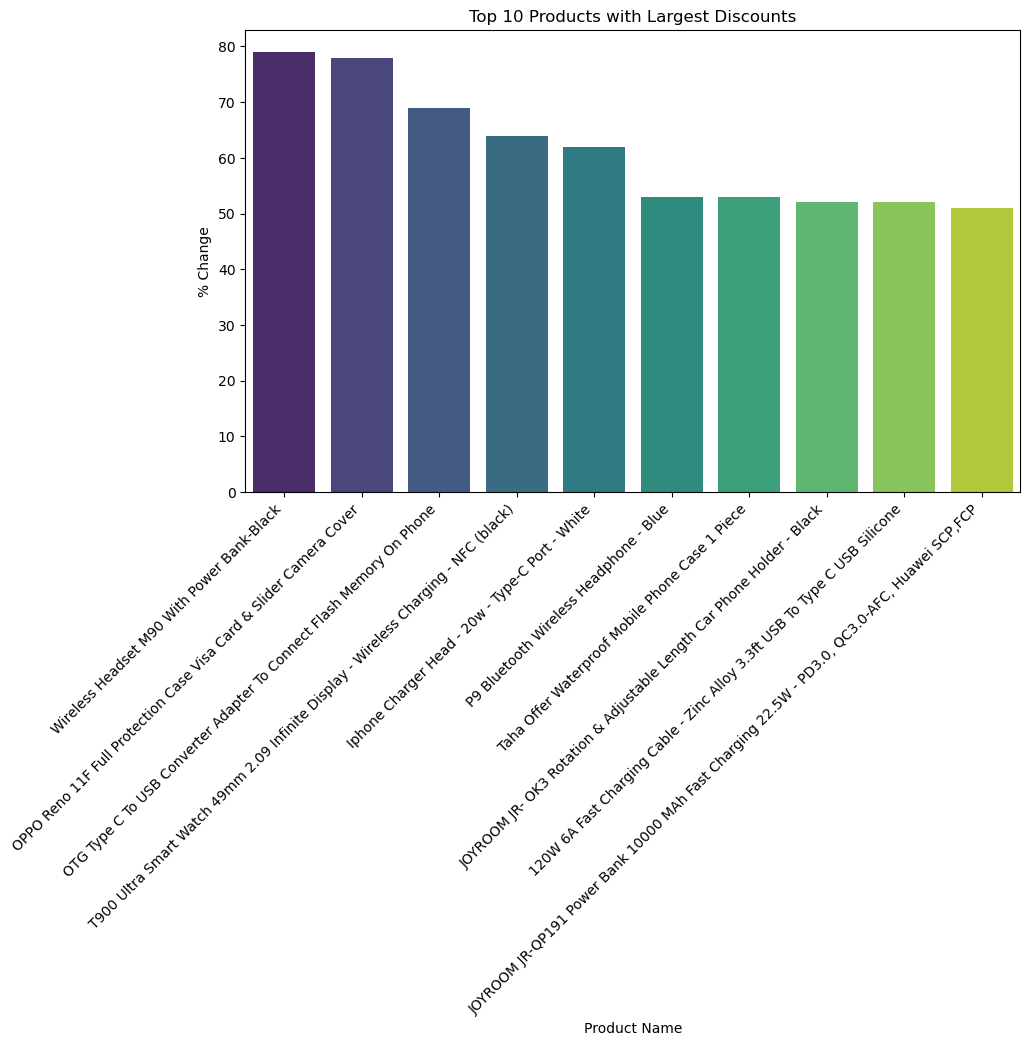

<Figure size 640x480 with 0 Axes>

In [60]:
# Sort by % change and select top 10
top_discounts = Jumia.nlargest(10, 'numeric_change')

# Plot the top discounts
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Name', y='numeric_change', data=top_discounts, palette='viridis')
plt.title('Top 10 Products with Largest Discounts')
plt.xlabel('Product Name')
plt.ylabel('% Change')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.savefig('my_bar_plot.png')



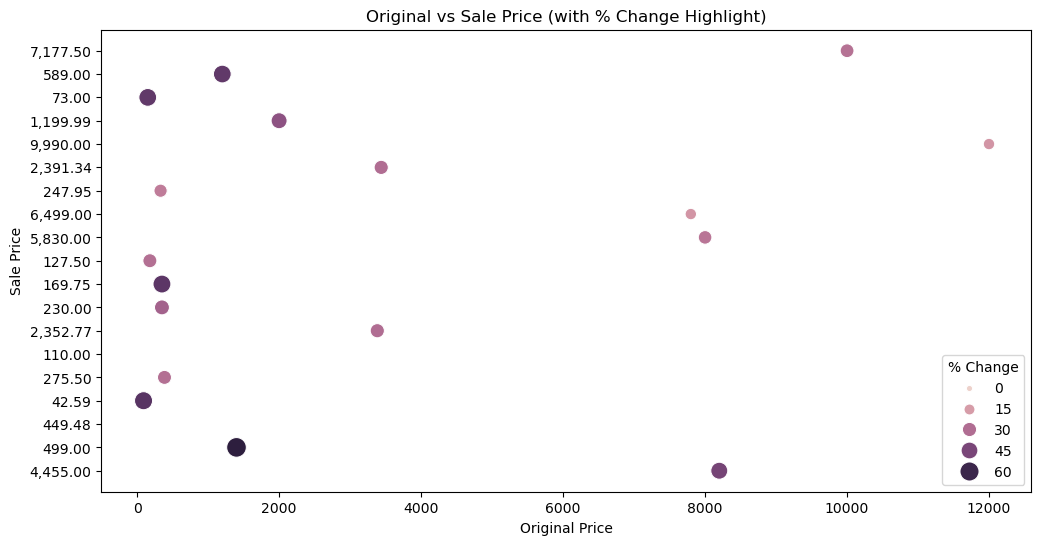

In [51]:
# Sample data for better visualization
sampled_data = Jumia.sample(20)  # Take a random sample of 20 products

# Plot comparison
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Original Price', y='Sale Price', data=sampled_data, hue='numeric_change', size='numeric_change', sizes=(20, 200))
plt.title('Original vs Sale Price (with % Change Highlight)')
plt.xlabel('Original Price')
plt.ylabel('Sale Price')
plt.legend(title='% Change')
plt.show()


In [53]:
Jumia["numeric_change"]

0     69.0
1     17.0
2     29.0
3     53.0
4     51.0
5     62.0
6     28.0
7     45.0
8     17.0
9     15.0
10    15.0
11    51.0
12    16.0
13    29.0
14    53.0
15    79.0
16    29.0
17    40.0
18    40.0
19    17.0
20    40.0
21    50.0
22    64.0
23    28.0
24     0.0
25     0.0
26    46.0
27    46.0
28    52.0
29    34.0
30    40.0
31    20.0
32    52.0
33    36.0
34    27.0
35    44.0
36    78.0
37    25.0
38     0.0
39    13.0
40    29.0
41    17.0
42    26.0
43    17.0
44    25.0
45    17.0
46    25.0
47    25.0
48    26.0
49    30.0
50    30.0
51    30.0
Name: numeric_change, dtype: float64

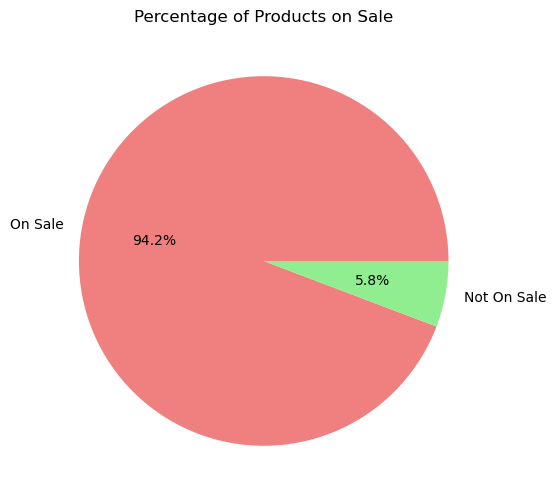

In [55]:
# Create a column indicating if a product is on sale
Jumia['on sale'] = Jumia['numeric_change'] > 0

# Count products on sale vs not on sale
sale_counts = Jumia['on sale'].value_counts()

# Plot the data
plt.figure(figsize=(6, 6))
sale_counts.plot.pie(autopct='%1.1f%%', labels=['On Sale', 'Not On Sale'], colors=['lightcoral', 'lightgreen'])
plt.title('Percentage of Products on Sale')
plt.ylabel('')
plt.show()


In [ ]:
# Filter out products with more than 70% discount
outliers = Jumia[Jumia['numeric_change'] > 50]

print("Products with extreme discounts:")
print(outliers)


Products with extreme discounts:
    Unnamed: 0                                       Product Name  \
0            0  OTG Type C To USB Converter Adapter To Connect...   
3            3             P9 Bluetooth Wireless Headphone - Blue   
4            4  JOYROOM JR-QP191 Power Bank 10000 MAh Fast Cha...   
5            5    Iphone Charger Head - 20w - Type-C Port - White   
11          11              Mobile Phone Holder With Base - Black   
14          14    Taha Offer Waterproof Mobile Phone Case 1 Piece   
15          15         Wireless Headset M90 With Power Bank-Black   
22          22  T900 Ultra Smart Watch 49mm 2.09 Infinite Disp...   
28          28  JOYROOM JR- OK3 Rotation & Adjustable Length C...   
32          32  120W 6A Fast Charging Cable - Zinc Alloy 3.3ft...   
36          36  OPPO Reno 11F Full Protection Case Visa Card &...   

                                          Product URL Sale Price  \
0   https://www.jumia.com.eg/otg-type-c-to-usb-con...      29.90   
3 

In [57]:
outliers.count()

Unnamed: 0        11
Product Name      11
Product URL       11
Sale Price        11
Original Price    11
Discount %        11
numeric_change    11
on sale           11
dtype: int64

In [58]:
print(outliers['Product Name'])

0     OTG Type C To USB Converter Adapter To Connect...
3                P9 Bluetooth Wireless Headphone - Blue
4     JOYROOM JR-QP191 Power Bank 10000 MAh Fast Cha...
5       Iphone Charger Head - 20w - Type-C Port - White
11                Mobile Phone Holder With Base - Black
14      Taha Offer Waterproof Mobile Phone Case 1 Piece
15           Wireless Headset M90 With Power Bank-Black
22    T900 Ultra Smart Watch 49mm 2.09 Infinite Disp...
28    JOYROOM JR- OK3 Rotation & Adjustable Length C...
32    120W 6A Fast Charging Cable - Zinc Alloy 3.3ft...
36    OPPO Reno 11F Full Protection Case Visa Card &...
Name: Product Name, dtype: object


### OTG Type C To USB Converter Adapter To Connect...
### P9 Bluetooth Wireless Headphone - Blue4     
### JOYROOM JR-QP191 Power Bank 10000 MAh Fast Cha...
### Iphone Charger Head - 20w - Type-C Port - White
### Mobile Phone Holder With Base - Black
### Taha Offer Waterproof Mobile Phone Case 1 Piece
### Wireless Headset M90 With Power Bank-Black
### T900 Ultra Smart Watch 49mm 2.09 Infinite Disp...
### JOYROOM JR- OK3 Rotation & Adjustable Length C...
### 120W 6A Fast Charging Cable - Zinc Alloy 3.3ft...
### OPPO Reno 11F Full Protection Case Visa Card &...